In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loc = r"C:\Users\me\Documents\datasets\booze\Alcohol_Related_Deaths_2001_to_2014.csv"

data = pd.read_csv(loc)

%matplotlib inline

In [ ]:
# This data comes from 'Statistics on Alcohol, England' released by the UK government.
# https://data.gov.uk/dataset/statistics_on_alcohol_england

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 5 columns):
Year                 546 non-null int64
ICD10_Code           546 non-null object
ICD10_Description    546 non-null object
Metric               546 non-null object
Value                546 non-null int64
dtypes: int64(2), object(3)
memory usage: 21.4+ KB


In [4]:
data.shape

(546, 5)

In [5]:
data.head()

,Year,ICD10_Code,ICD10_Description,Metric,Value
0,2014,Total,Total,All persons,6831
1,2014,F10,Mental and behavioural disorders due to use of...,All persons,489
2,2014,G31.2,Degeneration of nervous system due to alcohol,All persons,13
3,2014,G62.1,Alcoholic polyneuropathy,All persons,0
4,2014,I42.6,Alcoholic cardiomyopathy,All persons,84


In [ ]:
# We have 5 columns: two numerical and three categorical. The ICD10 columns convey the same
# information but in different formats. 

In [6]:
data.apply(lambda x: sum(x.isnull()))

Year                 0
ICD10_Code           0
ICD10_Description    0
Metric               0
Value                0
dtype: int64

In [7]:
# There are no nulls. 

In [8]:
data.apply(lambda x: len(x.unique()))

Year                  14
ICD10_Code            13
ICD10_Description     13
Metric                 3
Value                260
dtype: int64

In [ ]:
# There are 13 different types of alcohol related death and three different values for 
# the gender metric.
# Let's investigate further.

In [9]:
data.ICD10_Description.value_counts()

Alcoholic gastritis                                         42
Degeneration of nervous system due to alcohol               42
Alcoholic polyneuropathy                                    42
Poisoning by and exposure to alcohol undetermined intent    42
Alcoholic liver disease                                     42
Alcohol induced chronic pancreatitis                        42
Alcoholic cardiomyopathy                                    42
Accidental poisoning by and exposure to alcohol             42
Intentional self-poisoning by and exposure to alcohol       42
Total                                                       42
Mental and behavioural disorders due to use of alcohol      42
Fibrosis and cirrhosis of liver                             42
Chronic hepatitis not elsewhere classified                  42
Name: ICD10_Description, dtype: int64

In [ ]:
# Here we can see there are actually only twelve different types of alcohol related deaths. 
# There is a total column for each year. This is probably because the file was created from
# an excel file. Let's remove this redundant data.

In [10]:
data = data[data.ICD10_Code != 'Total']

In [11]:
data.Metric.value_counts()

Female         168
All persons    168
Male           168
Name: Metric, dtype: int64

In [12]:
# Create a dataframe that looks at everyone without dividing into male and female datasets.

df = data[data.Metric == 'All persons']

In [13]:
# Calculate total alcohol related deaths per year.

yearly_deaths = df.groupby(['Year'])['Value'].sum()

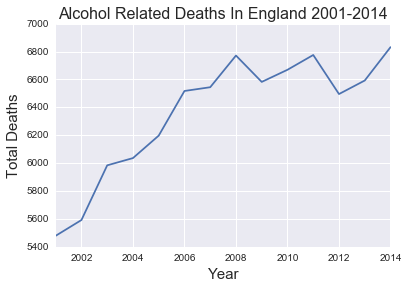

In [17]:
yearly_deaths.plot()
plt.ylabel('Total Deaths', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.title('Alcohol Related Deaths In England 2001-2014', fontsize=16)

In [ ]:
# We can see that the number of alcohol related deaths increased from 2001 to 2014 with the 
# majority of the rise occuring from 2001 to 2008. Total deaths fluctated from 2008 to 2012
# and then embarked on another rising trend.

In [22]:
# Note - The following numbers were obtained from Wikipedia.
# https://en.wikipedia.org/wiki/Demography_of_England

twenty_one = 49138831 
twenty_eleven = 53012456

change_in_population = ((twenty_eleven - twenty_one) / twenty_eleven) * 100

twenty_one = yearly_deaths[2001]
twenty_eleven = yearly_deaths[2011]

change_in_alcohol_deaths = ((twenty_eleven - twenty_one) / twenty_eleven) * 100

print (round(change_in_population, 2), round(change_in_alcohol_deaths, 2))

7.31 19.13


In [ ]:
# We can see that the increase in alcohol related deaths cannot be explained by population 
# increases alone. The increase in alcohol related deaths far outstrips the increase in 
# population (19.13% to 7.31%).

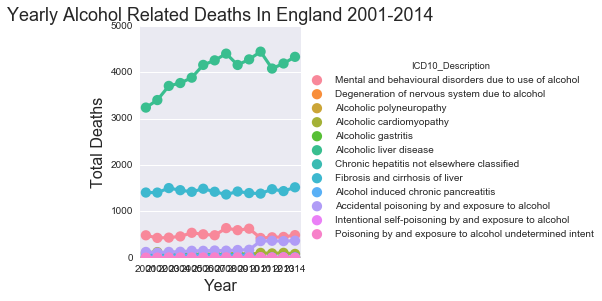

In [24]:
g = sns.factorplot(x="Year", y="Value", hue="ICD10_Description",
                   data=df, legend_out=True)

g.set(ylim=(0, None))
plt.ylabel('Total Deaths', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Yearly Alcohol Related Deaths In England 2001-2014', fontsize=18)

In [ ]:
# Note - This plot looks a lot better when run in Python. Sorry!

# The plot shows that increases in alcoholic liver disease have been the main driving force 
# behind the rise in alcohol related deaths in England. Two other factors showed small increases
# over the period: accidental poisoning by and exposure to alcohol and fibrosis and cirrhosis 
# of the liver.

In [25]:
# Let's explore the data further to investigate whether or not there are
# differences between the genders.

male = data[data.Metric == 'Male']
female = data[data.Metric == 'Female']
male = male.rename(columns={'Value': 'Male_Deaths'})
female = female.rename(columns={'Value': 'Female_Deaths'})

In [26]:
# Calculate total alcohol related deaths per year.

yearly_deaths_male = male.groupby(['Year'])['Male_Deaths'].sum()
yearly_deaths_female = female.groupby(['Year'])['Female_Deaths'].sum()

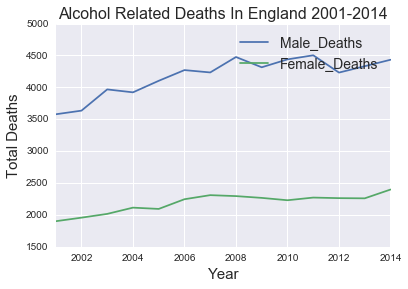

In [28]:
yearly_deaths_male.plot()
yearly_deaths_female.plot()
plt.legend(fontsize=14)
plt.ylabel('Total Deaths', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.title('Alcohol Related Deaths In England 2001-2014', fontsize=16)

In [ ]:
# Note - This plot looks a lot better when run in Python. Sorry!

# Alcohol related deaths over period 2001 to 2014 increased for both males and females. 
# The increase in male deaths was far larger than the increase in female deaths.

In [29]:
twenty_one = yearly_deaths_male[2001]
twenty_eleven = yearly_deaths_male[2011]

change_in_male_deaths = ((twenty_eleven - twenty_one) / twenty_eleven) * 100

twenty_one = yearly_deaths_female[2001]
twenty_eleven = yearly_deaths_female[2011]

change_in_female_deaths = ((twenty_eleven - twenty_one) / twenty_eleven) * 100

print (round(change_in_male_deaths, 2), round(change_in_female_deaths, 2))

20.54 16.33


In [ ]:
# Both female and male alcohol related deaths surpassed increases in population.

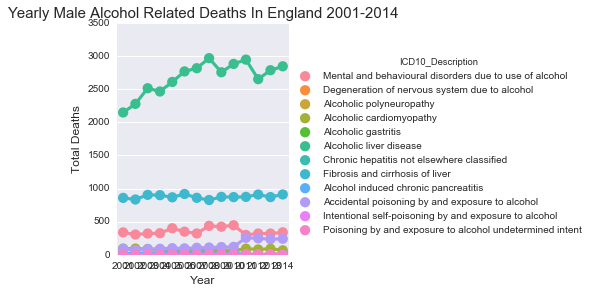

In [32]:
g = sns.factorplot(x="Year", y="Male_Deaths", hue="ICD10_Description",
                   data=male, legend_out=True)

g.set(ylim=(0, None))
plt.ylabel('Total Deaths', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Yearly Male Alcohol Related Deaths In England 2001-2014', fontsize=14)

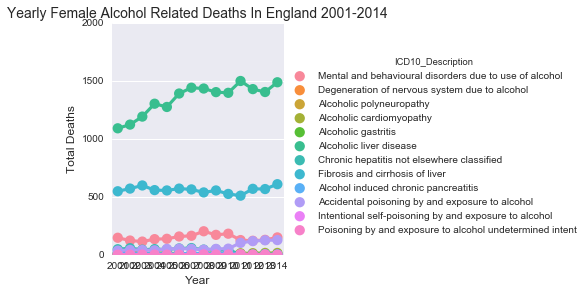

In [33]:
g = sns.factorplot(x="Year", y="Female_Deaths", hue="ICD10_Description",
                   data=female, legend_out=True)

g.set(ylim=(0, None))
plt.ylabel('Total Deaths', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Yearly Female Alcohol Related Deaths In England 2001-2014', fontsize=14)

In [ ]:
# Note - These plots looks a lot better when run in Python. Sorry!

# The trends for the causes of alcohol related deaths have followed similar patterns for both
# males and females. The biggest driver behind the rising trend is the increased incidence of 
# alcoholic liver disease.